Loading and PreProcessing the dataset

In [28]:
import pandas as pd
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [29]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [30]:
df.drop(['id'], axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [31]:
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

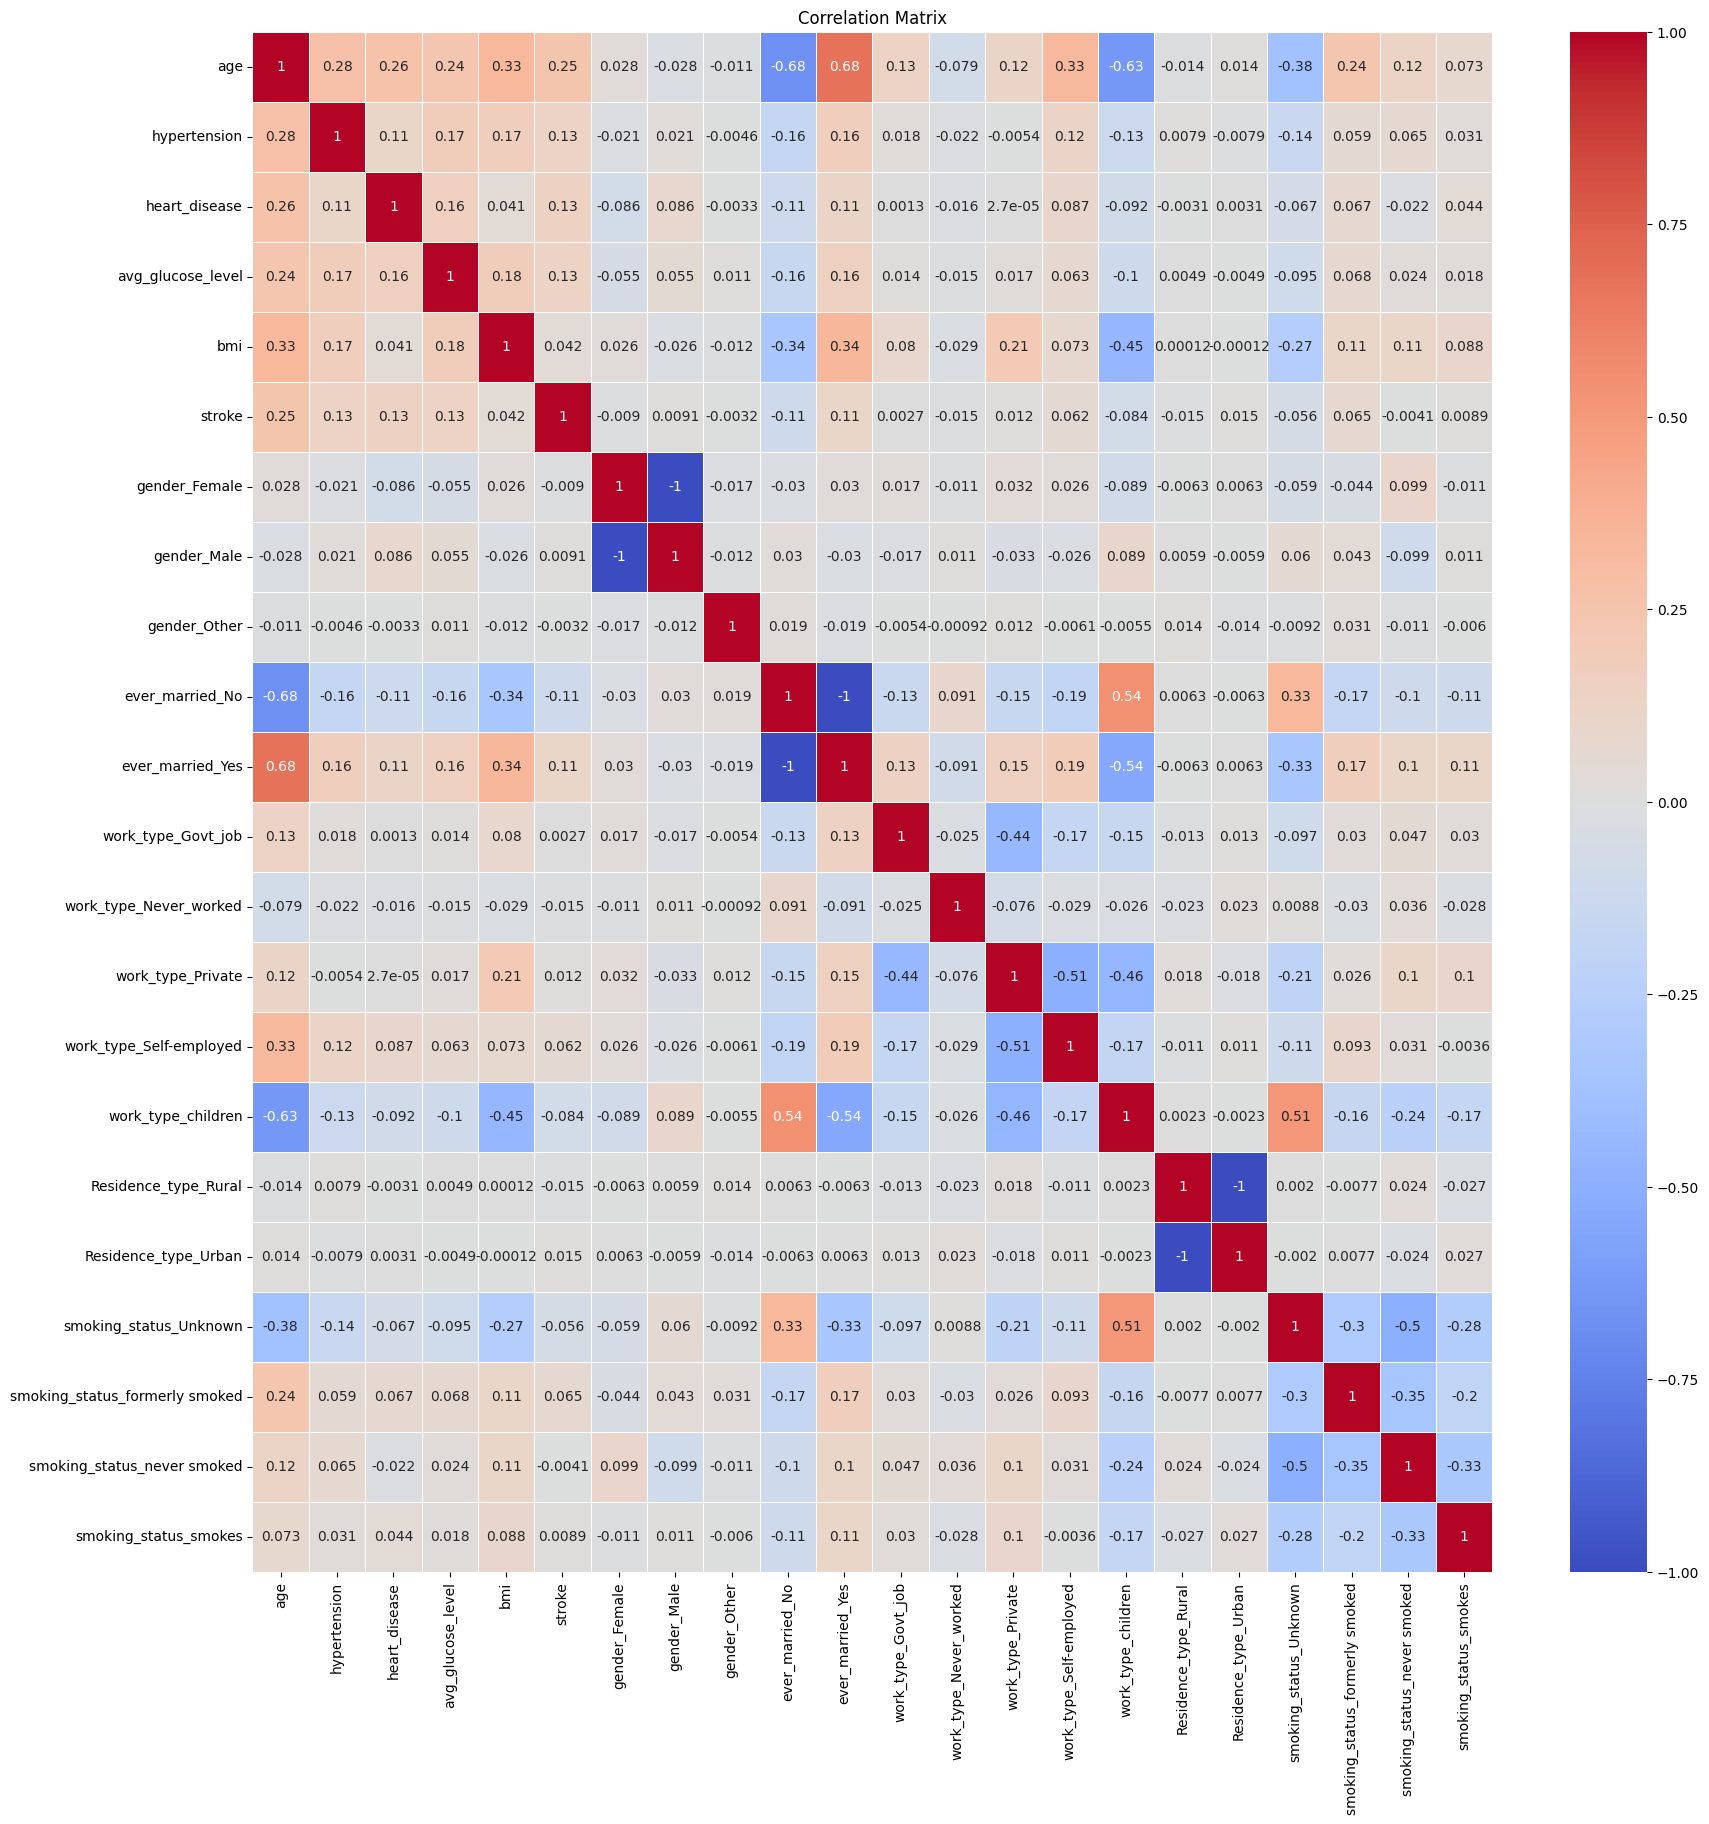

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

Splitting the dataset for training and testing

In [33]:
from sklearn.model_selection import train_test_split
X = df.drop(['stroke'], axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model training

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluation of the model

In [35]:
from sklearn.metrics import accuracy_score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9403131115459883


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[960   0]
 [ 61   1]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022



Explainable Ai part

In [37]:
pip install shap

In [38]:
import shap

# Initialize the SHAP TreeExplainer for RandomForest
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

In [39]:
print("Shape of SHAP values:", shap_values.shape)
print("Shape of X_test:", X_test.shape)


Shape of SHAP values: (1022, 21, 2)
Shape of X_test: (1022, 21)


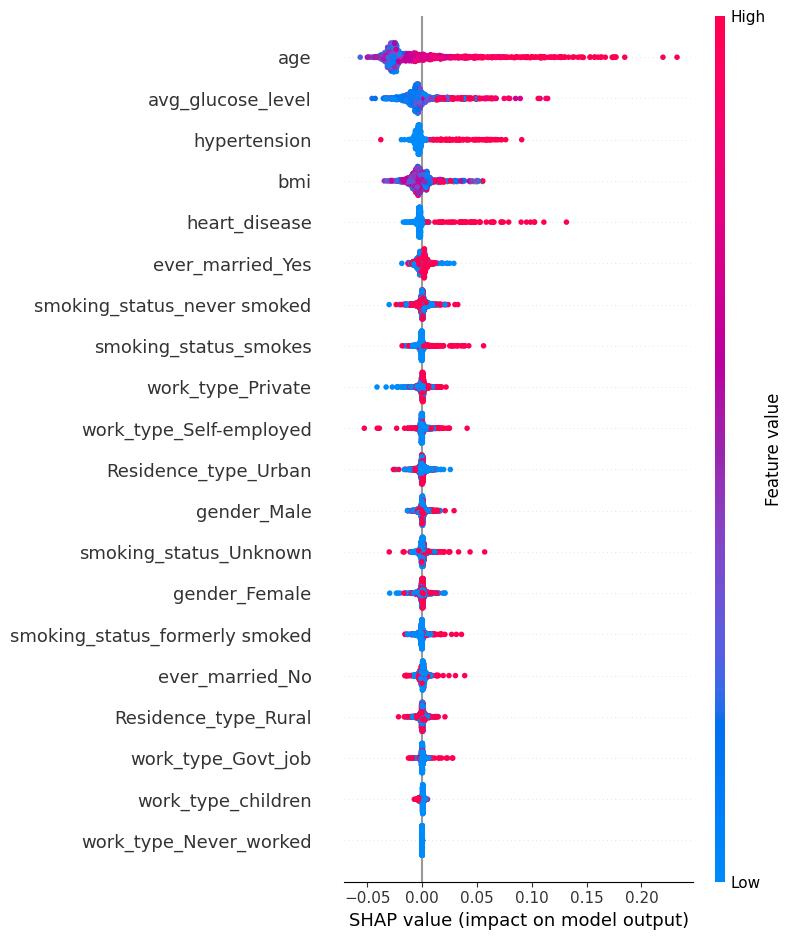

In [40]:
# For binary classification, shap_values[0] corresponds to class 0 and shap_values[1] corresponds to class 1.

# If you want to visualize SHAP values for class 1 (positive class)
shap.summary_plot(shap_values[:, :, 1], X_test)

# If you want to visualize SHAP values for class 0 (negative class)
# shap.summary_plot(shap_values[:, :, 0], X_test)


In [41]:
# shap.summary_plot(shap_values[:, :, 0], X_test)

In [42]:
# Explain a single prediction for class 1 (positive class)
shap.initjs()

# Selecting SHAP values for class 1 for the first instance (21 features)
shap.force_plot(explainer.expected_value[1], shap_values[:, :, 1][0], X_test.iloc[0])


In [43]:
# shap.initjs()
# shap.force_plot(explainer.expected_value[1], shap_values[:, :, 0][0], X_test.iloc[0])

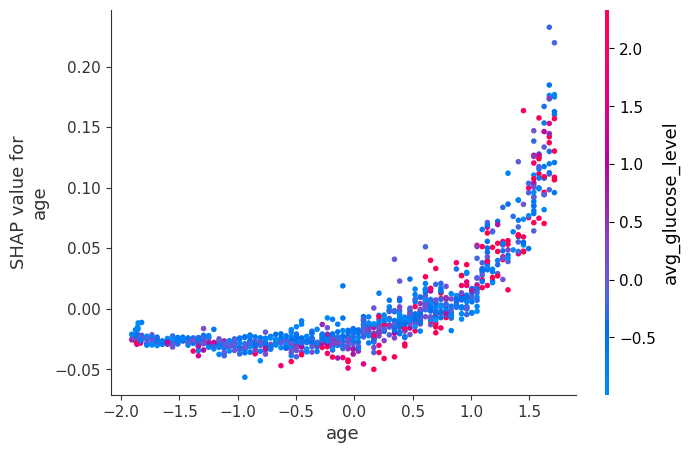

In [44]:
# Getting the index of 'age'
age_index = X_test.columns.get_loc('age')  # This should return 0

# SHAP dependence plot for 'age' using its index
shap.dependence_plot(age_index, shap_values[:, :, 1], X_test)


In [45]:
# # Assuming you want SHAP values for class 1 (positive class)
# shap_values_class_1 = shap_values[:, :, 1]  # SHAP values for class 1 across all features

# # Now we can plot the dependence plot for 'age'
# shap.dependence_plot(0, shap_values_class_1, X_test)  # 0 corresponds to the index of 'age'


In [52]:
print(X_test.columns)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


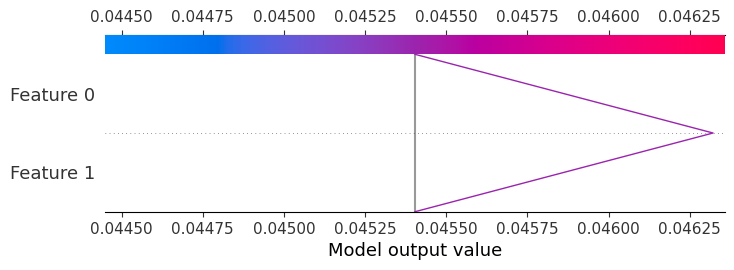

In [46]:
# Decision plot
shap.decision_plot(explainer.expected_value[1], shap_values[12][12])

Giving input to the model

In [47]:
import pandas as pd

# Example input data (replace with your actual input data)
input_data = {
    'age': [60],
    'hypertension': [1],
    'heart_disease': [1],
    'avg_glucose_level': [85.5],
    'bmi': [26.1],
    'gender': ['Male'],
    'ever_married': ['Yes'],
    'work_type': ['Private'],
    'Residence_type': ['Urban'],
    'smoking_status': ['smoked']
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# One-hot encode the input data to match training data encoding
input_encoded = pd.get_dummies(input_df)

# Align input_encoded with training data's columns (replace 'X_train.columns' with your actual column list)
input_encoded = input_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make prediction using the trained model
prediction = rf_model.predict(input_encoded)

# Output the prediction result (0 = No Stroke, 1 = Stroke)
print("Prediction (0 = No Stroke, 1 = Stroke):", prediction[0])


Prediction (0 = No Stroke, 1 = Stroke): 1
